# Problem
**add description**

---
### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

> LinearRegression : Class is used for implementing linear regression models during machine learning tasks
> train_test_split : 
> mean_squared_error : asd

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

---

## Setup : Importing the Dataset

Dataset on Singapore Used Car Prices created in May 2021 : Attached file `SG_usedcar.csv`     

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','Curb Weight','Manufactured','Transmission','ARF','Power','Engine Cap'],axis=1)

In [3]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,67304,41566,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,N.A,18180,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,25727,10763,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800


Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `7` variables/features/columns and `1000` observations/samples/rows in the dataset.    
* The response variable seems to be `Rating`, while the remaining 6 are most likely predictors.     
* There are `3` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `4` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value (have to check again, carefully).

## Setup: Cleaning the Dataset
Let us start by cleaning the dataset by:
- replacing the empty/NA values in the data set to nan 
- removing missing values
- extracting main brand names
- converting COE years+months to just months

In [4]:
#Change N.A to nan
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4396 non-null   object
 1   Type           4396 non-null   object
 2   Coe_left       4388 non-null   object
 3   Mileage        2840 non-null   object
 4   Dereg Value    3446 non-null   object
 5   COE            4138 non-null   object
 6   OMV            3978 non-null   object
 7   No. of Owners  4339 non-null   object
 8   Price          3676 non-null   object
dtypes: object(9)
memory usage: 309.2+ KB


In [5]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left            8
Mileage          1556
Dereg Value       950
COE               258
OMV               418
No. of Owners      57
Price             720
dtype: int64

In [6]:
#Removing missing values
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [7]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2529 non-null   object
 1   Type           2529 non-null   object
 2   Coe_left       2529 non-null   object
 3   Mileage        2529 non-null   object
 4   Dereg Value    2529 non-null   object
 5   COE            2529 non-null   object
 6   OMV            2529 non-null   object
 7   No. of Owners  2529 non-null   object
 8   Price          2529 non-null   object
dtypes: object(9)
memory usage: 197.6+ KB


In [8]:
for i,v in enumerate(carData.Brand):
    wordstr = v.split()
    carData['Brand'].loc[i] = str(wordstr[0]) 
    
# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,30009,18894,1,85800


In [9]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    423
Honda            355
Toyota           342
BMW              273
Mazda            126
Volkswagen       116
Audi             112
Nissan           107
Mitsubishi        94
Hyundai           88
Kia               62
Subaru            60
Porsche           56
Lexus             52
MINI              37
Volvo             37
Suzuki            34
Chevrolet         15
Peugeot           13
Opel              13
Skoda             12
SEAT              12
McLaren           12
Bentley           12
Land              11
Ford               9
Ferrari            9
Lamborghini        7
Infiniti           6
Maserati           4
Citroen            3
Proton             3
Rolls-Royce        2
Renault            2
Perodua            2
Jaguar             2
Cadillac           2
Hummer             1
Aston              1
Daihatsu           1
Alfa               1
Name: count, dtype: int64

In [10]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price
1,Suzuki,SUV,52,50000,31237,56001,19775,2,49800
4,Kia,Hatchback,18,203000,6656,21349,12154,2,12800
5,BMW,Sports Car,73,21000,106829,50110,71979,1,259988
13,Honda,Mid-Sized Sedan,41,35000,31339,64900,13856,1,44800
15,BMW,Mid-Sized Sedan,96,21200,38416,30009,18894,1,85800


In [11]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Type':'category'}
carData = carData.astype(convert_dict)
carData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   object  
 6   OMV            2529 non-null   object  
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(5), object(3)
memory usage: 245.2+ KB


In [12]:
convert_dict = {'Mileage': 'int64','COE': 'int64','OMV': 'int64', 'No. of Owners': 'int64','Price': 'int64','Dereg Value':'int64','Type':'category'}

In [13]:
carData = carData.astype(convert_dict)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   int64   
 6   OMV            2529 non-null   int64   
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
dtypes: category(1), int64(7), object(1)
memory usage: 245.2+ KB


---
## Exploratory Data Analysis
Let us explore the different data and variables that we have like `'Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE'` and the response variable `Price`, the one we want to predict at the end of the day.


In [14]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left']])

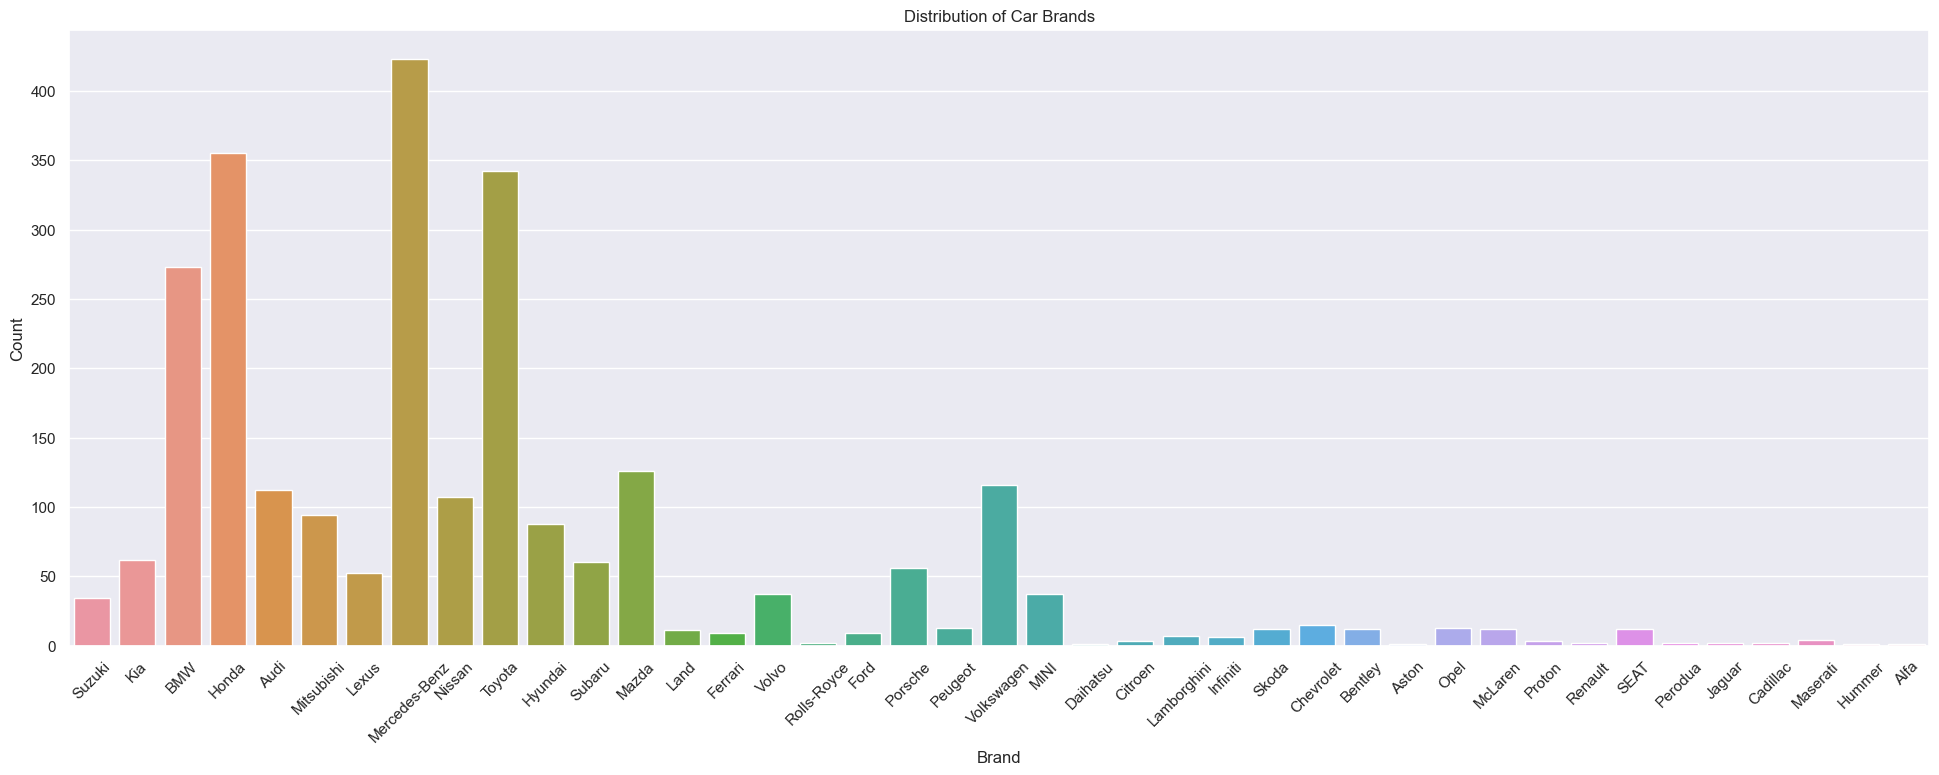

In [15]:
plt.figure(figsize=(24, 8))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*What can you observe from the distribution of Brand?* 
- The top 3 brands in descending order in count are Mercedes-Benz, Honda and Toyota.

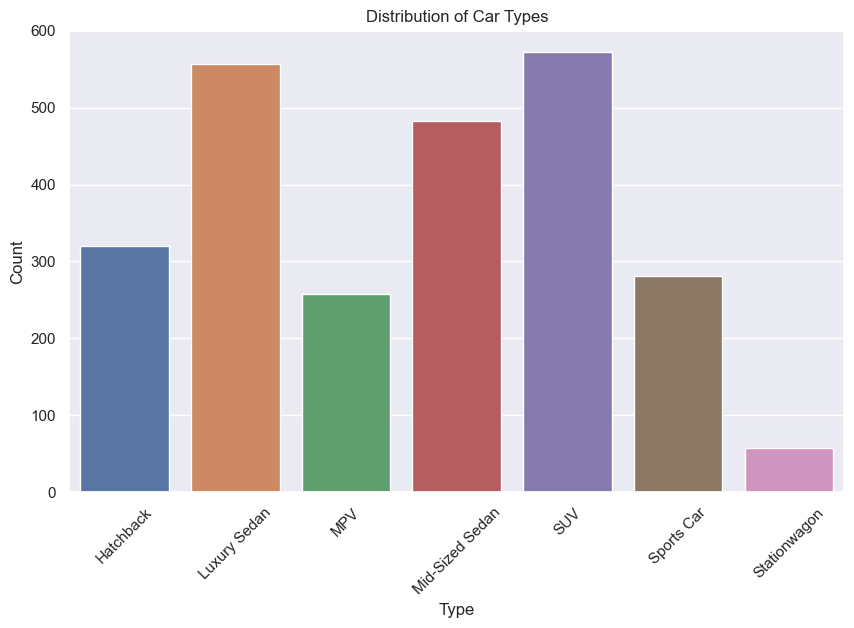

In [16]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*What can you observe from the distribution of Car Types?* 
- The top 3 car types in descending order are SUV, Luxury Sedan and Mid-Sized Sedan.


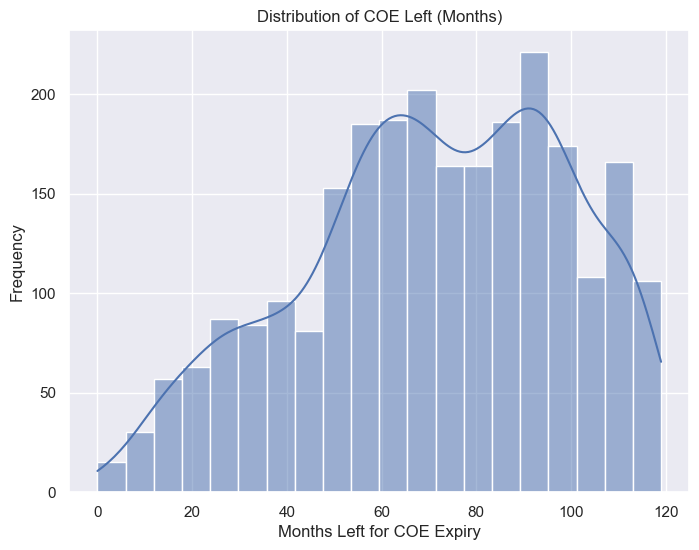

In [17]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


In [18]:
carDF['Coe_left'].describe()

count    2529.000000
mean       71.064848
std        28.110101
min         0.000000
25%        53.000000
50%        72.000000
75%        94.000000
max       119.000000
Name: Coe_left, dtype: float64

*What can you observe from the distribution of COE?* 
- Most cars are left with 85-90 months of COE left
- The mean number of COE left is around 71 months
- Min is 0 and max is 119 months.

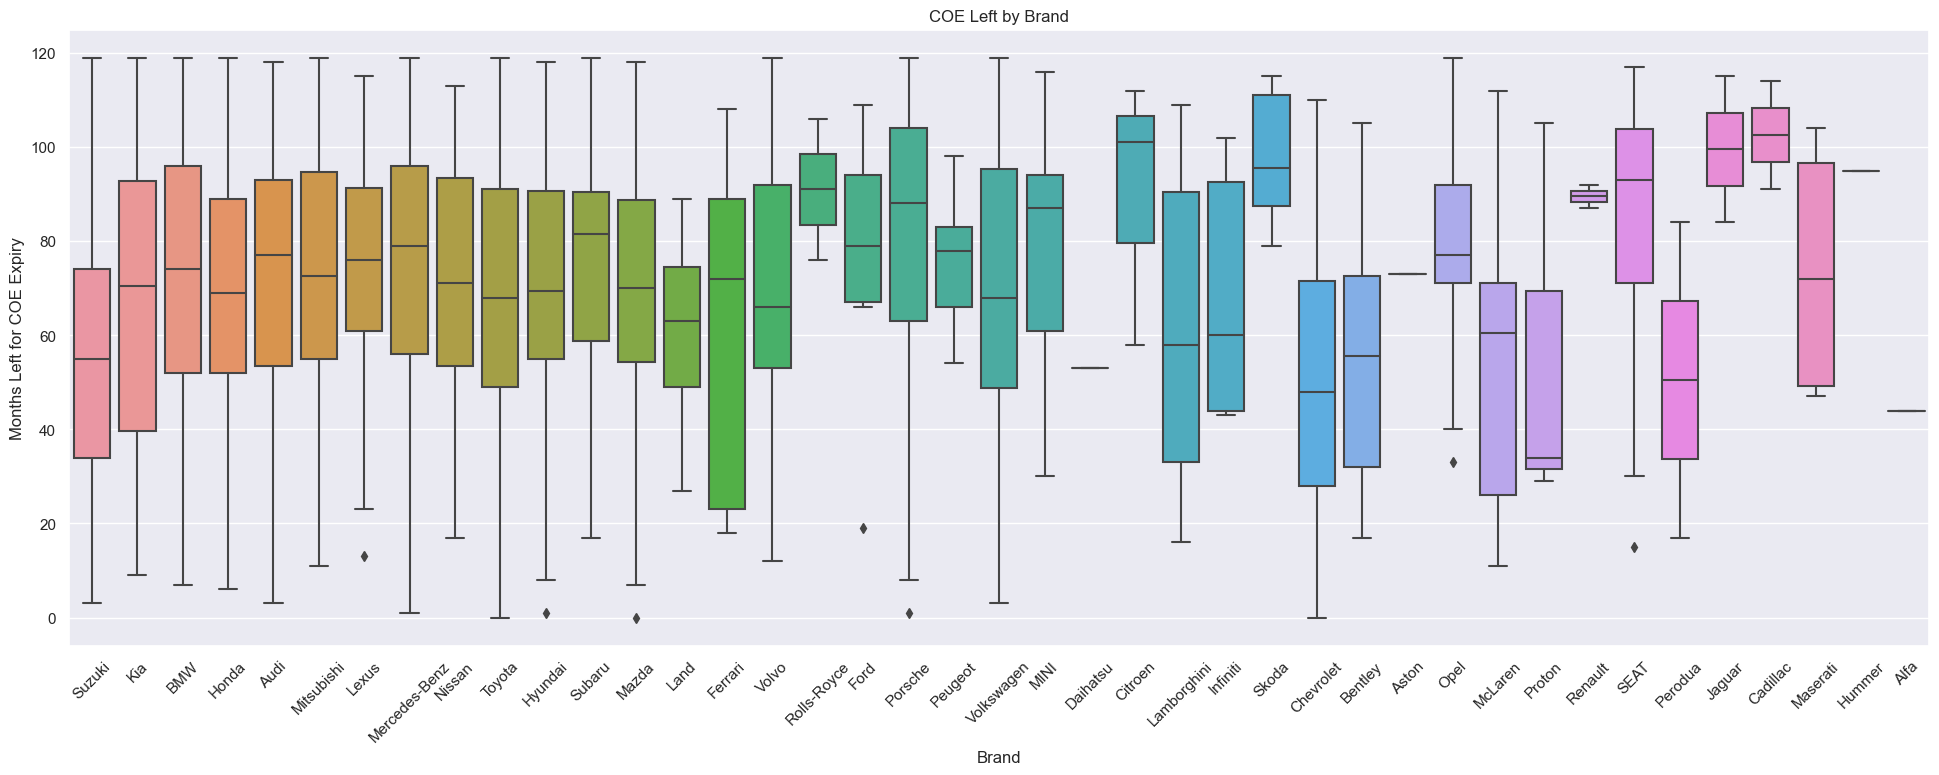

In [19]:
plt.figure(figsize=(24, 8))
sb.boxplot(x='Brand', y='Coe_left', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


Nothing much can be concluded from this graph.

### Predictors corresponding to the Price

In [20]:
mileage = pd.DataFrame(carData['Mileage'])
dereg = pd.DataFrame(carData['Dereg Value'])
price = pd.DataFrame(carData['Price'])


<Axes: >

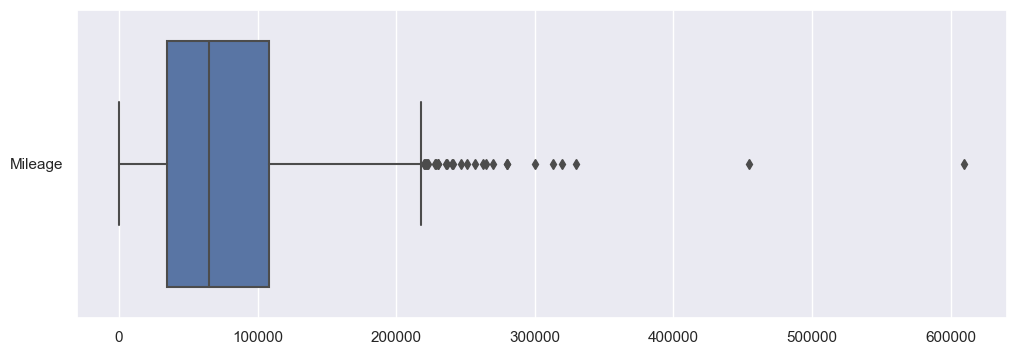

In [21]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = mileage, orient = "h")

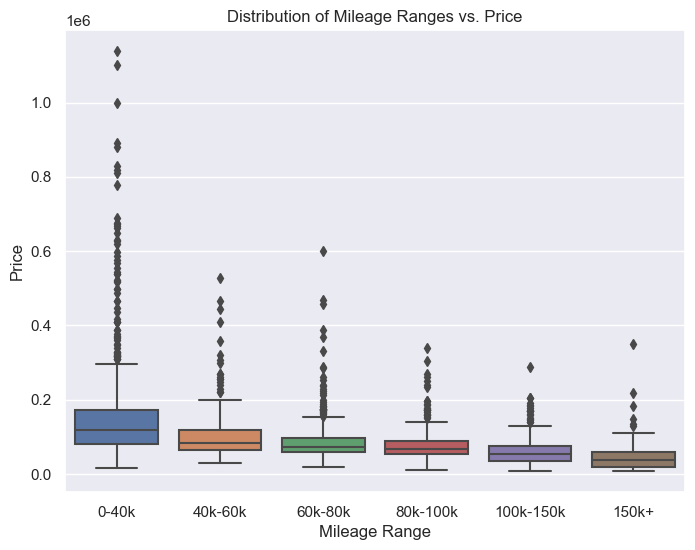

In [22]:
# Define the mileage ranges
mileage_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
mileage_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with mileage ranges
carData['Mileage Range'] = pd.cut(carData['Mileage'], bins=mileage_bins, labels=mileage_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Mileage Range', y='Price', data=carData)
plt.title('Distribution of Mileage Ranges vs. Price')
plt.xlabel('Mileage Range')
plt.ylabel('Price')
plt.show()

*What can you observe from the distribution of Mileage & its Range?* 
- The lower the mileage, the higher the car price.
- Most cars are below 100k mileage.

<Axes: >

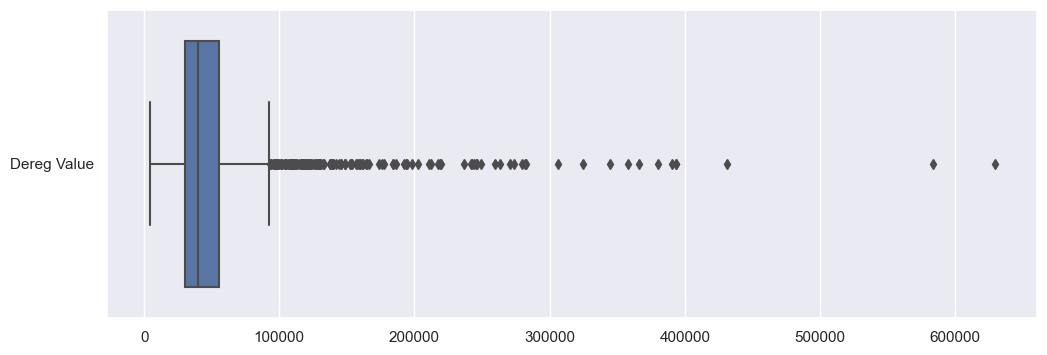

In [23]:
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = dereg, orient = "h")

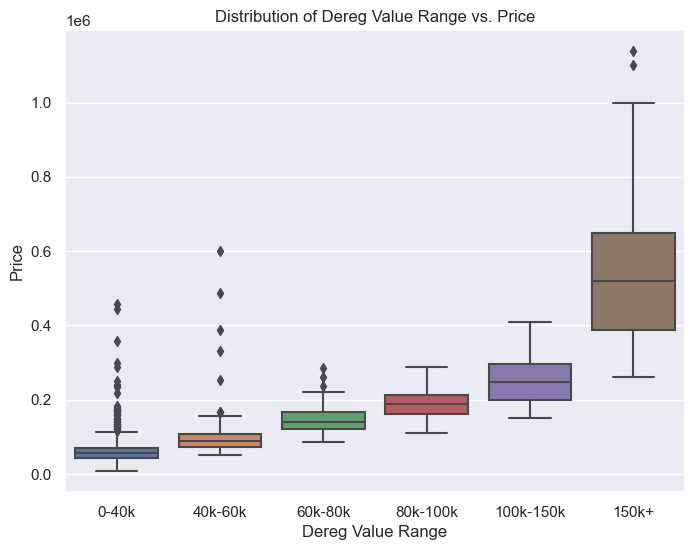

In [24]:
# Define the Dereg Value ranges
dereg_bins = [0, 40000, 60000, 80000, 100000, 150000, float('inf')]
dereg_labels = ['0-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

# Create a new column in the DataFrame with Dereg ranges
carData['Dereg Value Range'] = pd.cut(carData['Dereg Value'], bins=dereg_bins, labels=dereg_labels)

# Plot the boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Dereg Value Range', y='Price', data=carData)
plt.title('Distribution of Dereg Value Range vs. Price')
plt.xlabel('Dereg Value Range')
plt.ylabel('Price')
plt.show()

In [25]:
dereg.describe()

,Dereg Value
count,2529.000000
mean,48238.306841
std,41044.042056
min,4036.000000
25%,30400.000000
50%,39609.000000
75%,55418.000000
max,629526.000000


*What can you observe from the distribution of Dereg Value?* 
- The mean of the dereg value is around 48238 and the max is 629526 while the lowest is 4036.

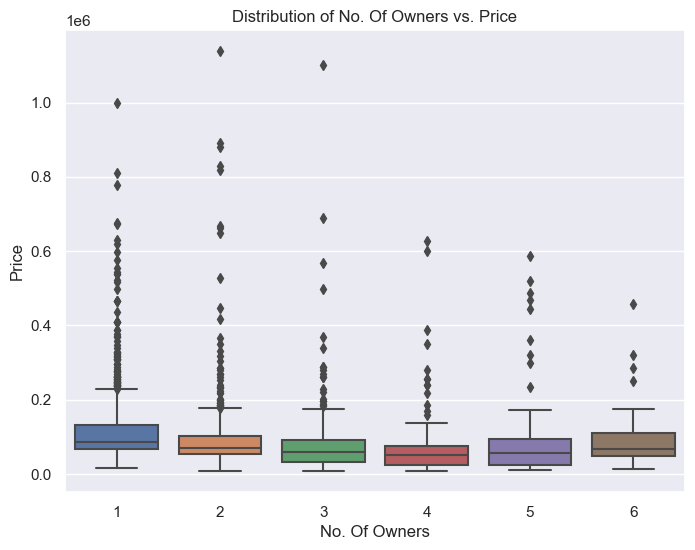

In [26]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='No. of Owners', y='Price', data=carData)
plt.title('Distribution of No. Of Owners vs. Price')
plt.xlabel('No. Of Owners')
plt.ylabel('Price')
plt.show()

*What can you observe from the distribution of No. Of Owners?* 
- Generally as the no. of owners increases, the car price decreases.

## Create a model for Price

## Model 1 (Linear Regression)

We will start simple with a Linear regression model.

- Since we have categorical variables, we have to encode them first

In [27]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
carData_cat = carData[['Brand','Type']]
ohe.fit(carData_cat)
carData_cat_ohe = pd.DataFrame(ohe.transform(carData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(carData_cat.columns))

# Check the encoded variables
carData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand_Alfa            2529 non-null   float64
 1   Brand_Aston           2529 non-null   float64
 2   Brand_Audi            2529 non-null   float64
 3   Brand_BMW             2529 non-null   float64
 4   Brand_Bentley         2529 non-null   float64
 5   Brand_Cadillac        2529 non-null   float64
 6   Brand_Chevrolet       2529 non-null   float64
 7   Brand_Citroen         2529 non-null   float64
 8   Brand_Daihatsu        2529 non-null   float64
 9   Brand_Ferrari         2529 non-null   float64
 10  Brand_Ford            2529 non-null   float64
 11  Brand_Honda           2529 non-null   float64
 12  Brand_Hummer          2529 non-null   float64
 13  Brand_Hyundai         2529 non-null   float64
 14  Brand_Infiniti        2529 non-null   float64
 15  Brand_Jaguar         

After encoding we will now combine it with the other variables

In [28]:
# Combining Numeric features with the OHE Categorical features
carData_num = carData[['Coe_left','Mileage','Dereg Value','COE','OMV', 'No. of Owners']]
carData_res = carData['Price']

# Reset index for all DataFrames
carData_num.reset_index(drop=True, inplace=True)
carData_cat_ohe.reset_index(drop=True, inplace=True)
carData_res.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
carData_ohe = pd.concat([carData_num, carData_cat_ohe, carData_res], axis=1)

# Check the final dataframe
carData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Coe_left              2529 non-null   int64  
 1   Mileage               2529 non-null   int64  
 2   Dereg Value           2529 non-null   int64  
 3   COE                   2529 non-null   int64  
 4   OMV                   2529 non-null   int64  
 5   No. of Owners         2529 non-null   int64  
 6   Brand_Alfa            2529 non-null   float64
 7   Brand_Aston           2529 non-null   float64
 8   Brand_Audi            2529 non-null   float64
 9   Brand_BMW             2529 non-null   float64
 10  Brand_Bentley         2529 non-null   float64
 11  Brand_Cadillac        2529 non-null   float64
 12  Brand_Chevrolet       2529 non-null   float64
 13  Brand_Citroen         2529 non-null   float64
 14  Brand_Daihatsu        2529 non-null   float64
 15  Brand_Ferrari        

Now we can start with the Linear Regression Model

In [29]:
# Extract Response and Predictors
y = pd.DataFrame(carData_ohe['Price'])
X = pd.DataFrame(carData_ohe.drop('Price', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [30]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [14288.94346544]
Coefficients of Regression 	: a =  [[ 4.36055784e+02 -1.09356261e-01  1.35679520e+00 -5.96861502e-01
   8.64640373e-01 -1.72586475e+03 -3.47426976e-10 -4.68511500e+03
  -5.42982618e+03 -3.19804482e+03 -2.98686953e+04  1.09448204e+03
  -6.50776540e+03 -2.89725833e+03 -1.01924112e+04  3.64570213e+04
   3.88467270e+03 -2.47157620e+03  2.88938467e+04 -1.83374653e+03
  -3.13701203e+03  6.49504281e+02 -5.18396599e+03 -1.97616636e+04
  -4.03286368e+03 -5.73166667e+03  3.40214534e+03  7.70414430e+03
  -4.03514344e+03 -2.46581101e+03 -5.68312261e+02 -2.69746465e+03
  -5.13938111e+03 -6.37535304e+03 -9.28933633e+03 -1.46331274e+04
   7.65391691e+03  4.59001594e+03 -8.33924483e+03  7.45069675e+04
   1.70381950e+03  2.99044097e+03 -2.43804555e+03 -2.13218857e+03
  -3.46038982e+03 -6.49644281e+03 -5.29125726e+02 -1.02136923e+03
  -5.66312749e+03 -3.45362396e+03 -5.27102546e+03  2.16459395e+03
   1.61557543e+04 -2.91120209e+03]]


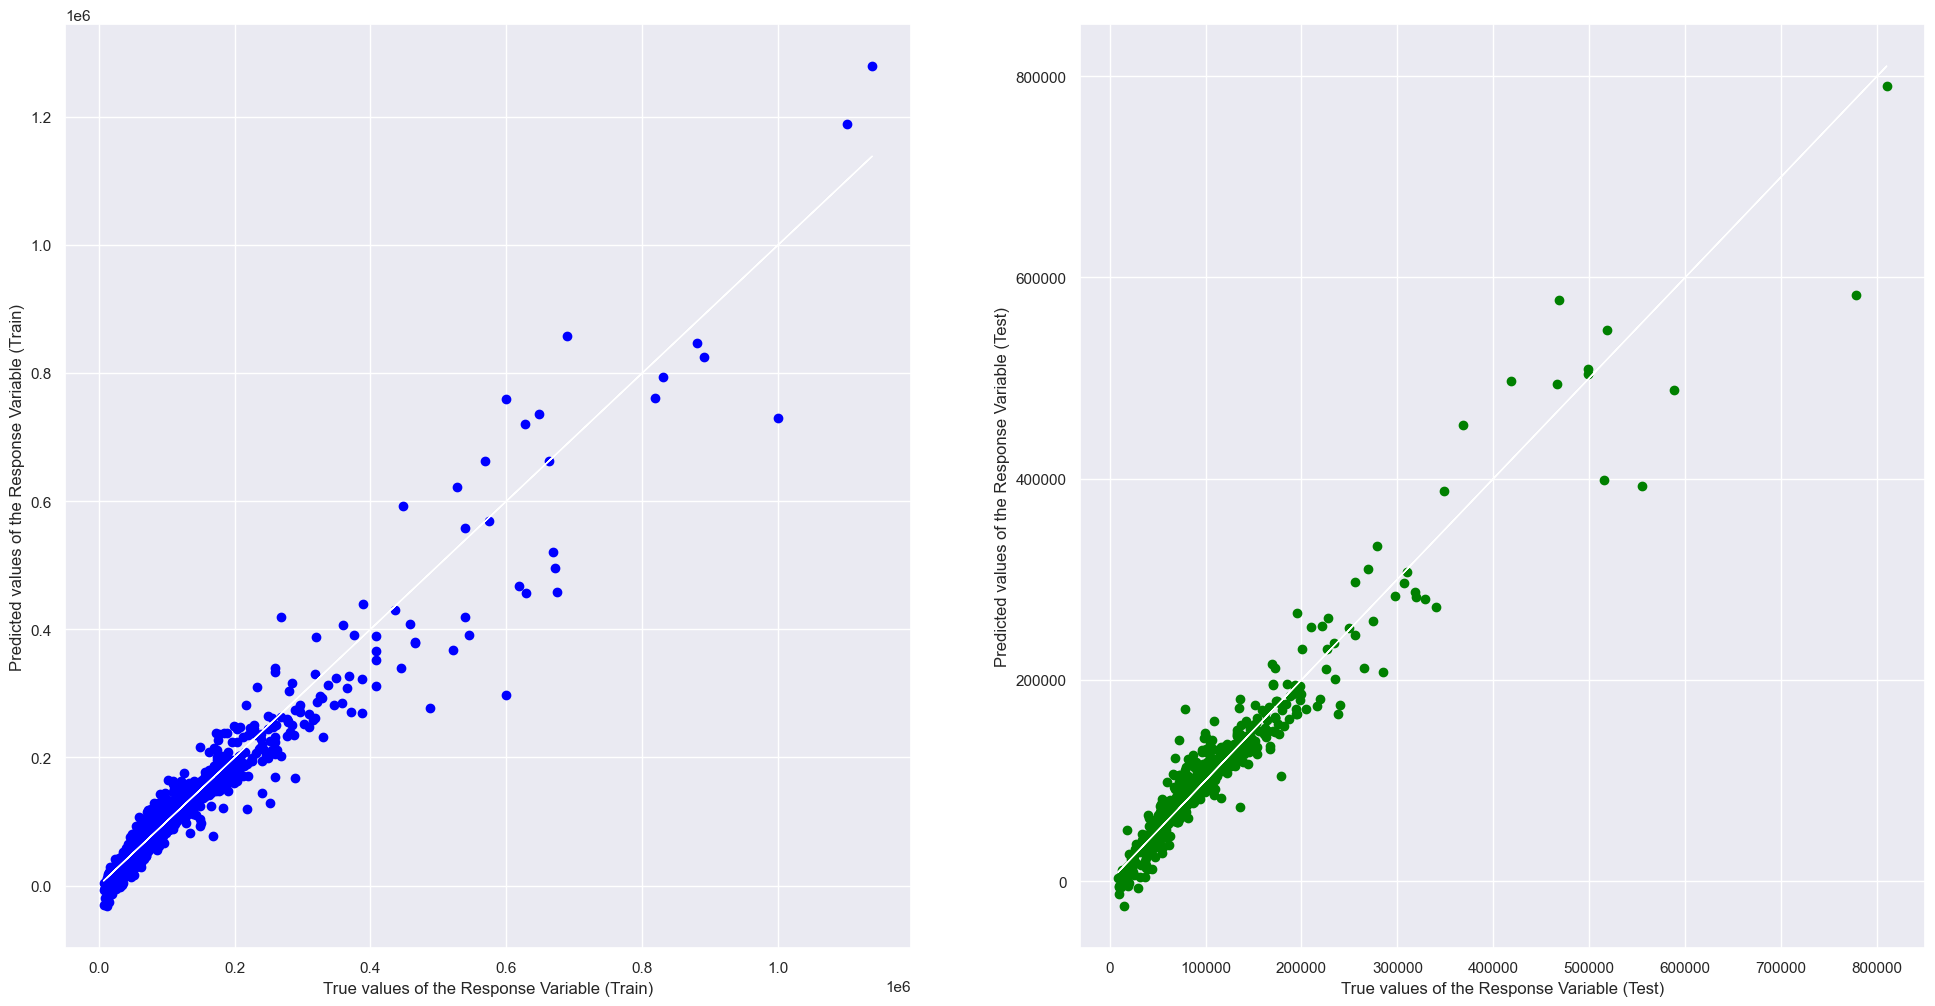

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9300018292727064
Mean Squared Error (MSE) 	: 654021810.3820817

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9326176531788398
Mean Squared Error (MSE) 	: 488152485.5526268



In [31]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

- The high R^2 values indicate that the model explains a large portion of the variance in the dependent variable.
- The relatively low MSE values suggest that the model's predictions are close to the actual values, though the test dataset's MSE is slightly higher than that of the training dataset.

## Model 2 (Lasso Regression)

We shall try refining the model by using Lasso Regression

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=50)

# Apply Lasso regression
alpha = 0.1  # You can experiment with different values of alpha
lasso = Lasso(alpha=0.1, max_iter= 100000 )

# Fit the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=100000)

In [33]:
# Coefficients of the Lasso Regression line
print('Intercept of Lasso Regression \t: b = ', lasso.intercept_)
print('Coefficients of Lasso Regression \t: a = ', lasso.coef_)

# Predict Response corresponding to Predictors
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

Intercept of Lasso Regression 	: b =  [100940.52234663]
Coefficients of Lasso Regression 	: a =  [ 1.22552113e+04 -5.73706595e+03  5.56773140e+04 -9.72514508e+03
  3.37595944e+04 -2.15113677e+03  0.00000000e+00 -3.39909257e+01
 -5.05550164e+02 -7.00440218e+01 -1.84822753e+03  1.14234046e+02
 -2.71396067e+02  2.51188438e+00 -1.43470902e+02  2.34783011e+03
  4.08216108e+02  1.73743455e+02  6.33440799e+02  2.08505786e+02
 -7.92706844e+00  1.01656656e+02 -3.41970082e+02 -8.81999119e+02
 -6.97193867e+01 -3.91523591e+02  7.65234936e+02  4.24178978e+02
 -2.31225742e+02  3.47109656e+01  8.97007606e+02  5.18306219e+01
 -4.36164745e+02 -2.43281814e+02 -1.77500460e+02 -8.33794796e+02
  1.56351717e+03  2.60178307e+02 -1.50786364e+02  2.17784333e+03
  3.21254203e+02  4.09605151e+02  8.11690330e+01  9.66215411e+01
 -1.66948348e+02 -7.37209554e+02  2.93235770e+02  0.00000000e+00
 -1.92346837e+03 -7.36044750e+02 -1.67025535e+03  1.33290048e+03
  5.39819443e+03 -2.82755079e+02]


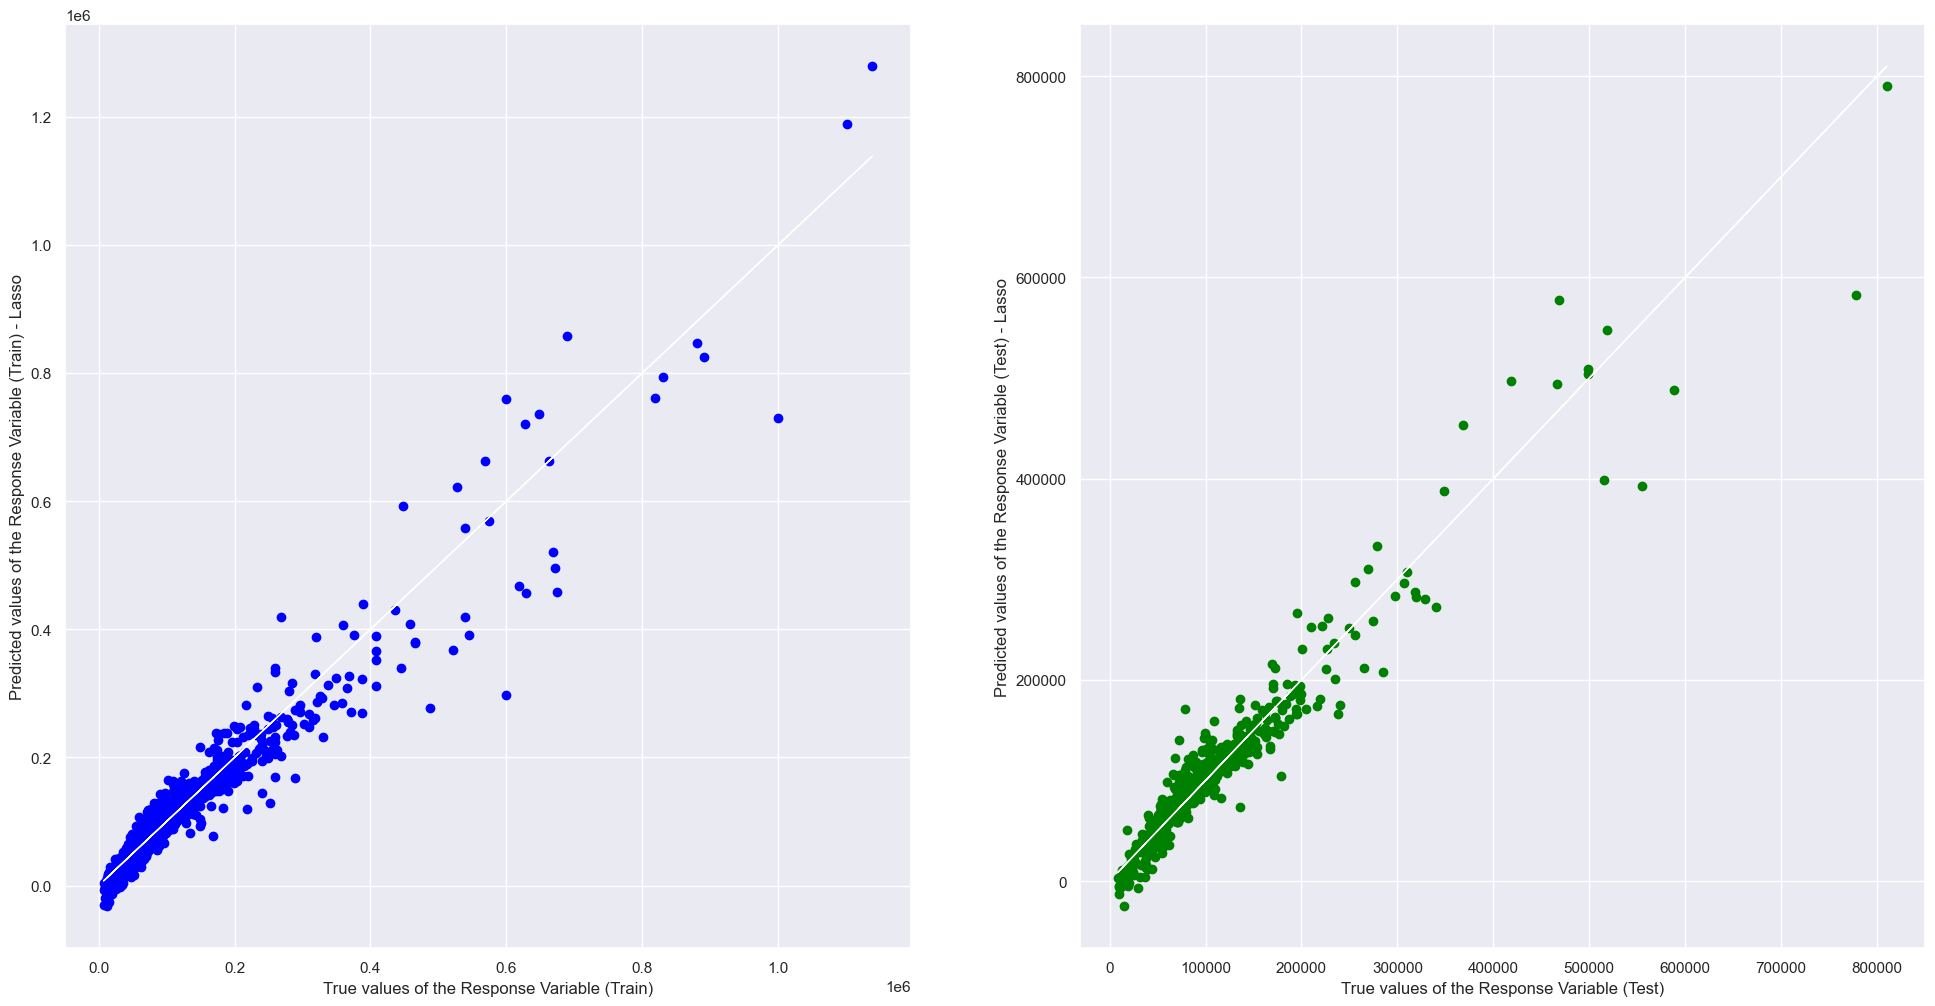

Goodness of Fit of Lasso Model 	Train Dataset
Explained Variance (R^2) 	: 0.9300018292226024
Mean Squared Error (MSE) 	: 654021810.8502228

Goodness of Fit of Lasso Model 	Test Dataset
Explained Variance (R^2) 	: 0.9326478542249853
Mean Squared Error (MSE) 	: 487933693.592452



In [34]:
# Plot the Predictions vs the True values for Lasso Regression
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_lasso, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train) - Lasso")
axes[1].scatter(y_test, y_test_pred_lasso, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test) - Lasso")
plt.show()

# Check the Goodness of Fit (on Train Data) for Lasso Regression
print("Goodness of Fit of Lasso Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_lasso))
print()

# Check the Goodness of Fit (on Test Data) for Lasso Regression
print("Goodness of Fit of Lasso Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lasso.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_lasso))
print()

For both the train and test datasets, the explained variance (R^2) of Model 2 (lasso regression) is very similar to that of Model 1 (linear regression). This suggests that both models are able to explain a similar amount of variance in the dependent variable.

The mean squared error (MSE) of Model 2 (lasso regression) is slightly lower than that of Model 1 (linear regression) for both the train and test datasets. A lower MSE indicates better predictive performance, suggesting that Model 2 might be performing slightly better in terms of predicting the target variable compared to Model 1.

Overall, Model 2 (lasso regression) seems to perform slightly better than Model 1 (linear regression) in terms of predictive accuracy, as indicated by the lower MSE values. Additionally, Model 2 retains a similar level of explained variance compared to Model 1, implying that it achieves this improved performance without sacrificing much in terms of explanatory power.

## Model 3 (Random Forest Regression)

Trying another regression model to see if it works better

In [35]:
# Create the Random Forest object
rforest = RandomForestRegressor(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree
rforest.fit(X_train, y_train)

C:\Users\jerry_liy6suo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=4)

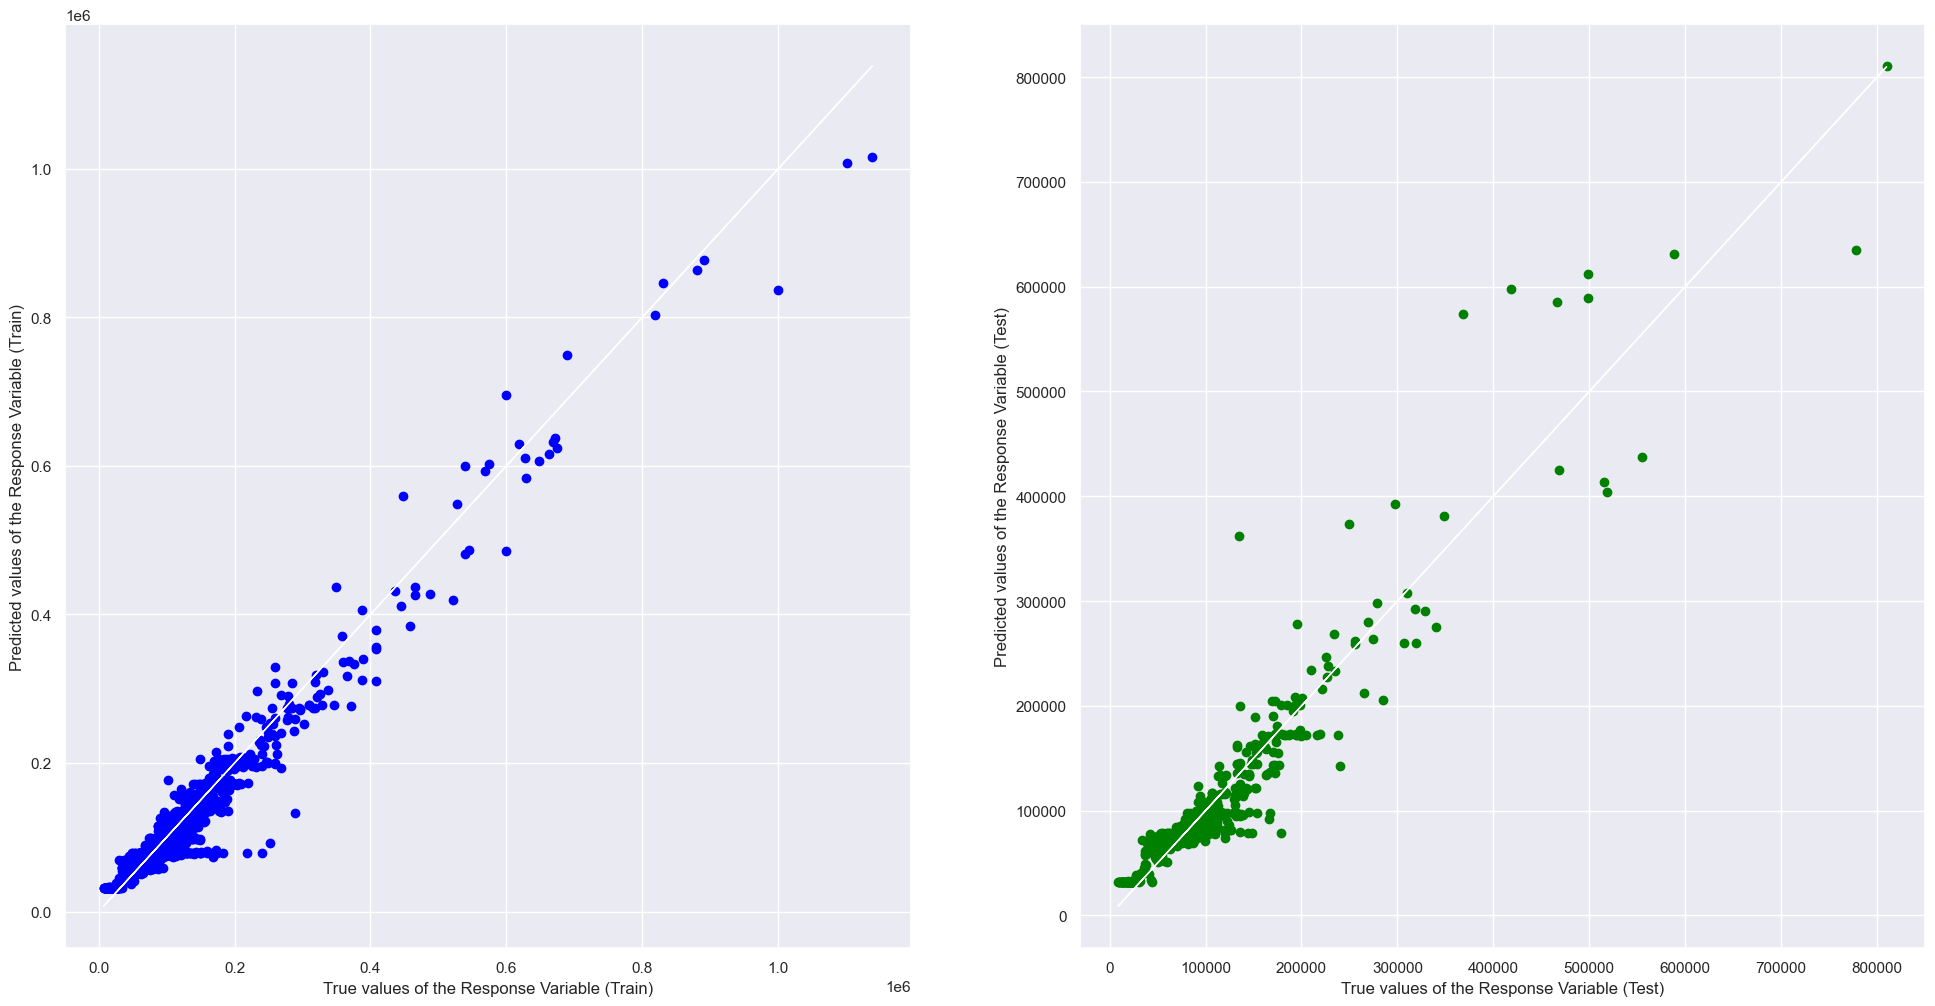

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9498684063394558
Mean Squared Error (MSE) 	: 468400178.21242356

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8954524211330479
Mean Squared Error (MSE) 	: 757396601.4847281


In [36]:
# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))


The explained variance (R^2) of Model 3 (random forest) on the train dataset is higher than that of both Model 1 (linear regression) and Model 2 (lasso regression), indicating that Model 3 explains more of the variance in the dependent variable.However, on the test dataset, Model 3 has a lower explained variance (R^2) compared to Model 1 (linear regression) and Model 2 (lasso regression). This suggests that Model 3 might be overfitting the training data to some extent.

The mean squared error (MSE) of Model 3 (random forest) on the train dataset is lower than that of both Model 1 (linear regression) and Model 2 (lasso regression), indicating better performance in terms of prediction accuracy.However, on the test dataset, Model 3 has a higher MSE compared to Model 1 (linear regression) and Model 2 (lasso regression), indicating worse performance in terms of prediction accuracy.

Overall, Model 3 (random forest) shows superior performance on the train dataset in terms of explained variance and MSE compared to the linear regression (Model 1) and lasso regression (Model 2). However, on the test dataset, Model 3's performance seems to degrade, possibly due to overfitting. Model 1 and Model 2 appear to generalize better to unseen data, especially indicated by their lower MSE values on the test dataset.

## Model 4 (Cleaned Random Forest)

We shall try to remove outliers from the data and increasing the depth of the model

In [37]:
# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X))

# Define a threshold for outlier removal (e.g., z-score > 3)
threshold = 3

# Filter out data points with z-scores above the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from X and y
clean_X = X.drop(X.index[outlier_indices])
clean_y = y.drop(y.index[outlier_indices])

# Continue with model training using clean_X and clean_y


In [38]:
# Split the Dataset into Train and Test
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size = 0.25, random_state=50)

In [39]:
# Create the Random Forest object
rforest2 = RandomForestRegressor(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree
rforest2.fit(clean_X_train, clean_y_train)

C:\Users\jerry_liy6suo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, n_estimators=50)

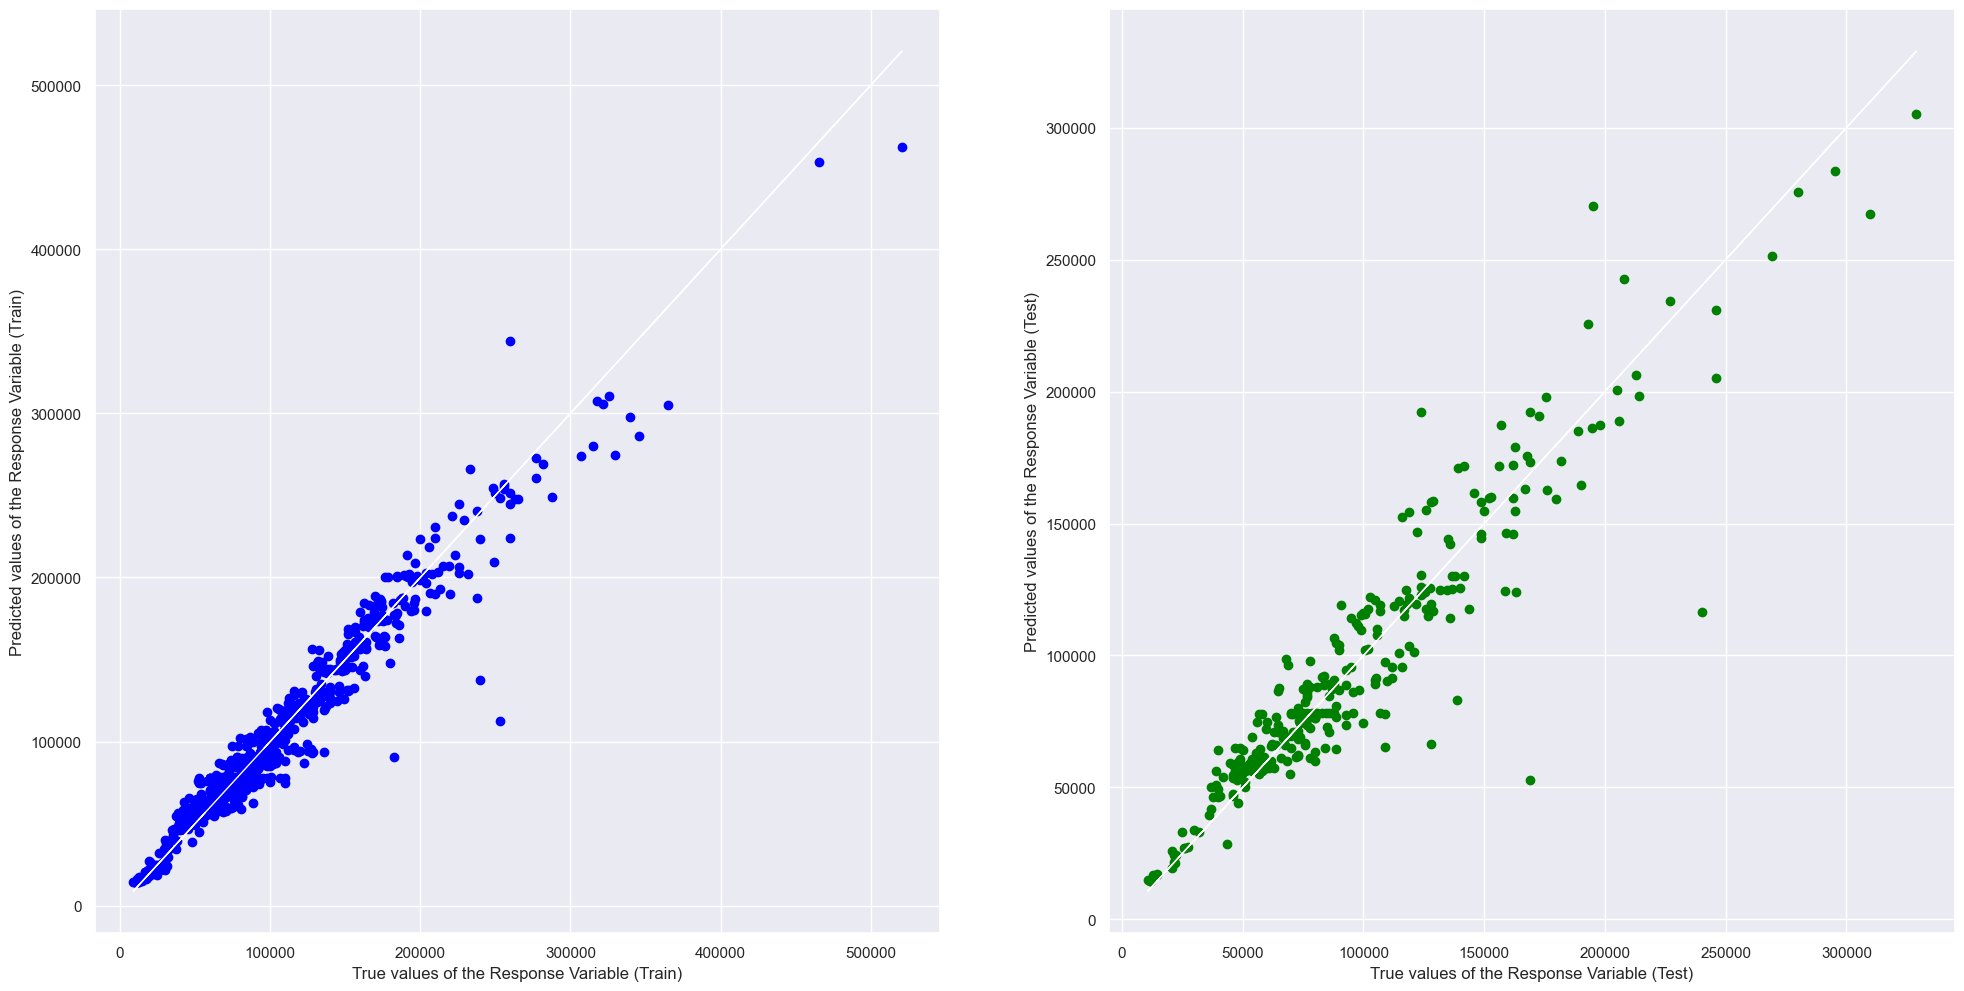

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9547193793732354
Mean Squared Error (MSE) 	: 166394811.72808638

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8877781009503682
Mean Squared Error (MSE) 	: 310712041.83305746


In [40]:
# Predict Response corresponding to Predictors
clean_y_train_pred = rforest2.predict(clean_X_train)
clean_y_test_pred = rforest2.predict(clean_X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(clean_y_train, clean_y_train_pred, color="blue")
axes[0].plot(clean_y_train, clean_y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(clean_y_test, clean_y_test_pred, color="green")
axes[1].plot(clean_y_test, clean_y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest2.score(clean_X_train, clean_y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(clean_y_train, clean_y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest2.score(clean_X_test, clean_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(clean_y_test, clean_y_test_pred))


Model 4 (cleaned random forest) exhibits a higher explained variance (R^2) on the train dataset compared to all previous models, indicating better performance in explaining the variance in the dependent variable during training. On the test dataset, Model 4's explained variance (R^2) is slightly lower than that of the linear regression models (Models 1 and 2), but higher than the random forest model without cleaning (Model 3). This suggests that Model 4 still maintains good explanatory power while potentially reducing overfitting.

Model 4 (cleaned random forest) achieves a significantly lower mean squared error (MSE) on both the train and test datasets compared to all previous models. This indicates improved prediction accuracy and generalization.

Overall, Model 4 (cleaned random forest) outperforms all previous models in terms of both explained variance and mean squared error. It achieves higher explanatory power than the random forest model without cleaning (Model 3) while significantly reducing the MSE, suggesting better generalization to unseen data and potentially alleviating issues related to overfitting.

## Model 5 (Cleaned Lasso Regression)

-Seeing the improvement, we shall try and see if this model will be better than model 4.

In [41]:
# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X))

# Define a threshold for outlier removal (e.g., z-score > 3)
threshold = 3

# Filter out data points with z-scores above the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from X and y
clean_X = X.drop(X.index[outlier_indices])
clean_y = y.drop(y.index[outlier_indices])

# Standardize the features
scaler = StandardScaler()
clean_X_scaled = scaler.fit_transform(clean_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_X_scaled, clean_y, test_size=0.25, random_state=42)

# Apply Lasso regression
alpha = 0.1  # You can experiment with different values of alpha
lasso2 = Lasso(alpha=0.1, max_iter= 100000 )

# Fit the model
lasso2.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=100000)

In [42]:
# Coefficients of the Lasso Regression line
print('Intercept of Lasso Regression \t: b = ', lasso2.intercept_)
print('Coefficients of Lasso Regression \t: a = ', lasso2.coef_)

# Predict Response corresponding to Predictors
y_train_pred_lasso = lasso2.predict(X_train)
y_test_pred_lasso = lasso2.predict(X_test)

Intercept of Lasso Regression 	: b =  [93435.54767974]
Coefficients of Lasso Regression 	: a =  [  7180.89362541  -7321.30346019  39326.78973241 -10414.68838047
  12720.41862298   -188.35068306      0.              0.
      0.             87.54847797      0.              0.
      0.              0.              0.              0.
      0.          -1180.50767081      0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.            607.37957426      0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
   -125.81995427      0.              0.            658.80301895
   -656.88689874     -0.           -747.8910296    2061.30439291
   4918.94904264      0.        ]


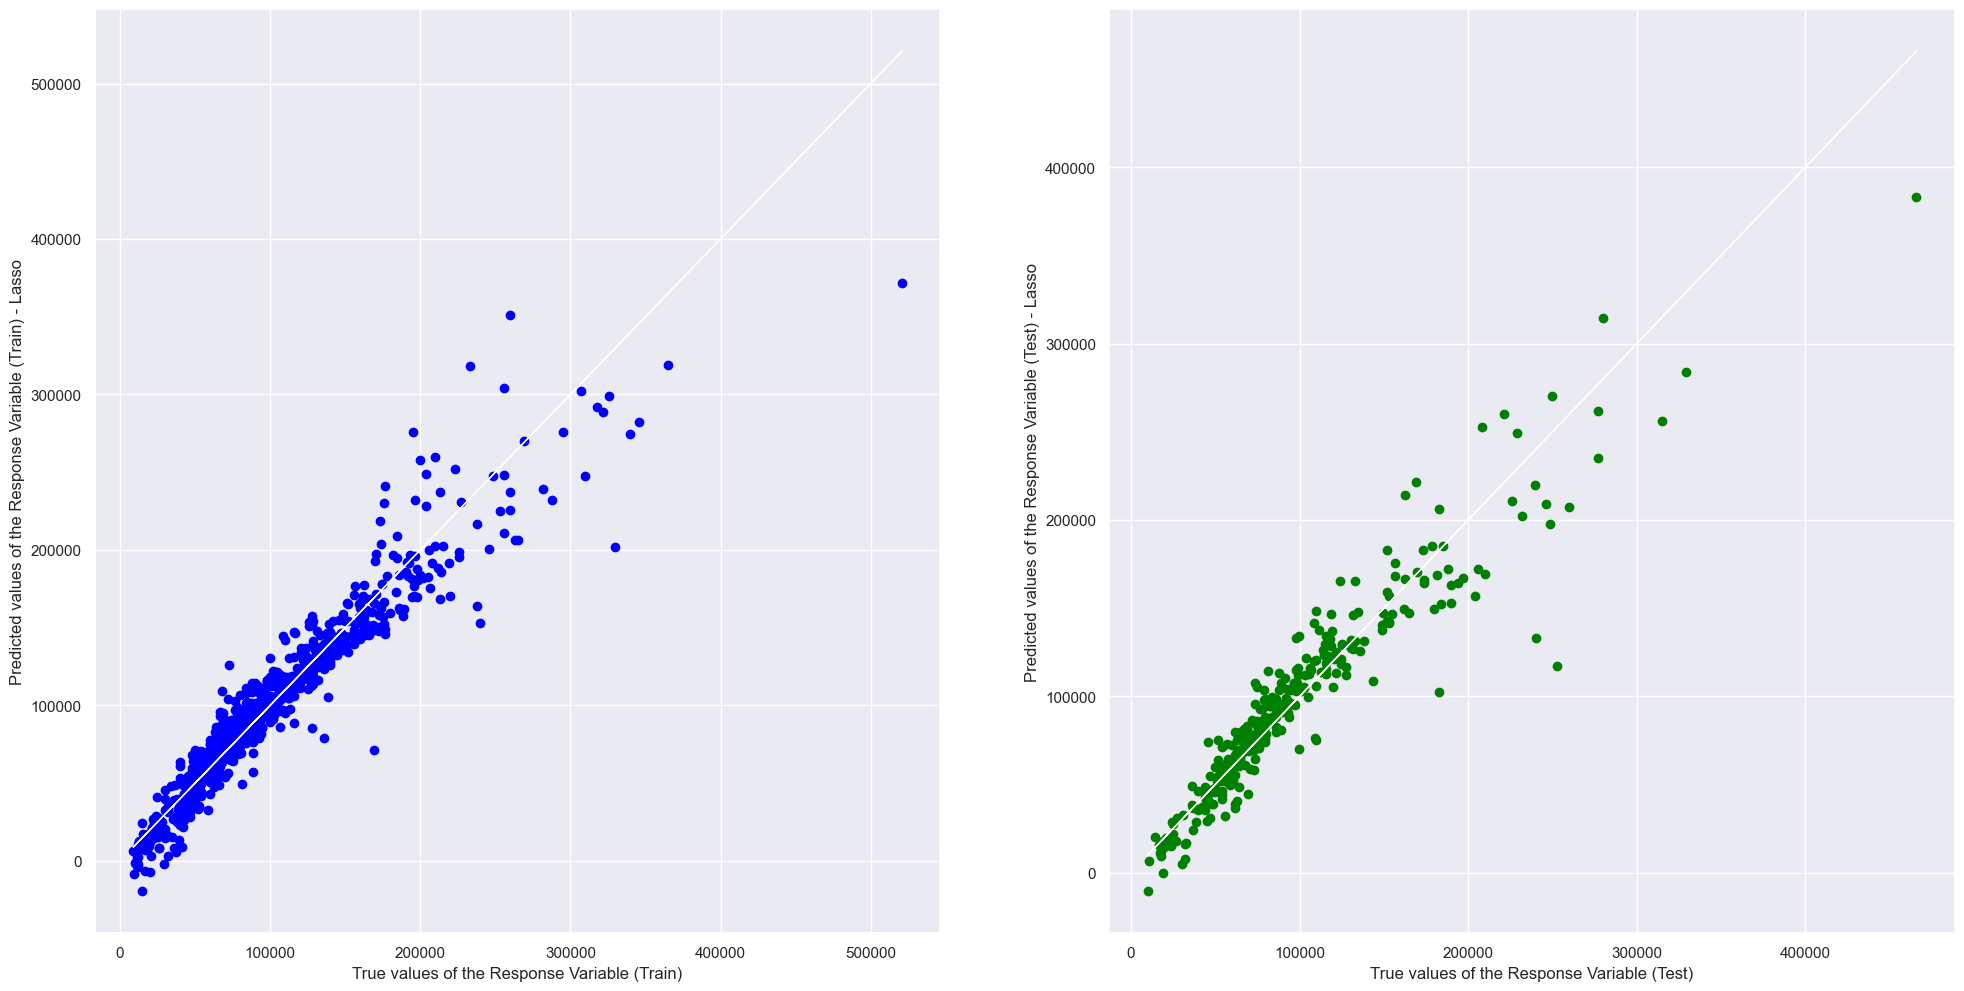

Goodness of Fit of Lasso Model 	Train Dataset
Explained Variance (R^2) 	: 0.9169429713890154
Mean Squared Error (MSE) 	: 282103802.83049387

Goodness of Fit of Lasso Model 	Test Dataset
Explained Variance (R^2) 	: 0.8925733136417973
Mean Squared Error (MSE) 	: 386438722.4008195



In [43]:
# Plot the Predictions vs the True values for Lasso Regression
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_lasso, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train) - Lasso")
axes[1].scatter(y_test, y_test_pred_lasso, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test) - Lasso")
plt.show()

# Check the Goodness of Fit (on Train Data) for Lasso Regression
print("Goodness of Fit of Lasso Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lasso2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_lasso))
print()

# Check the Goodness of Fit (on Test Data) for Lasso Regression
print("Goodness of Fit of Lasso Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lasso2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_lasso))
print()

Model 5 (cleaned lasso regression) achieves a higher explained variance (R^2) on both the train and test datasets compared to the initial lasso regression model (Model 2). This suggests that the cleaning process has improved the model's ability to explain the variance in the dependent variable.

Model 5 (cleaned lasso regression) exhibits a lower mean squared error (MSE) on the train dataset compared to the initial lasso regression model (Model 2), indicating improved predictive accuracy on the training data. However, on the test dataset, Model 5 has a slightly higher MSE compared to the initial lasso regression model (Model 2). This suggests that while Model 5 performs better on the training data, it may not generalize quite as well to unseen data.

Overall, Model 5 (cleaned lasso regression) shows improvements in both explained variance and mean squared error compared to the initial lasso regression model (Model 2) on both the train and test datasets. However, it seems to slightly sacrifice generalization performance, as indicated by the slightly higher MSE on the test dataset. Nonetheless, the improvements in explained variance and train MSE suggest that the cleaning process has had a positive impact on the model's performance.

## Conclusion

Considering the nature of predicting car resale prices, where accuracy and generalization are crucial, Model 4 (Cleaned Random Forest) or Model 5 (Cleaned Lasso Regression) might be the best choices. These models have demonstrated improvements in predictive accuracy while potentially reducing overfitting through cleaning and regularization techniques.

## For users to predict Car Resales Price

In [44]:
car_brands = [
    "Alfa",
    "Aston",
    "Audi",
    "BMW",
    "Bentley",
    "Cadillac",
    "Chevrolet",
    "Citroen",
    "Daihatsu",
    "Ferrari",
    "Ford",
    "Honda",
    "Hummer",
    "Hyundai",
    "Infiniti",
    "Jaguar",
    "Kia",
    "Lamborghini",
    "Land",
    "Lexus",
    "MINI",
    "Maserati",
    "Mazda",
    "McLaren",
    "Mercedes-Benz",
    "Mitsubishi",
    "Nissan",
    "Opel",
    "Perodua",
    "Peugeot",
    "Porsche",
    "Proton",
    "Renault",
    "Rolls-Royce",
    "SEAT",
    "Skoda",
    "Subaru",
    "Suzuki",
    "Toyota",
    "Volkswagen",
    "Volvo"
]

valid_types = [
    "Hatchback",
    "Luxury Sedan",
    "MPV",
    "Mid-Sized Sedan",
    "SUV",
    "Sports Car",
    "Stationwagon"
]


In [45]:
valid = 0

while valid == 0:
    brand_input = input("Please Enter Car Brand(First Letter Uppercase): ")
    brand_input = brand_input
    if brand_input in car_brands:
        valid = 1
    else:
        print(f"No, {brand_input} is not avaliable.") 


valid = 0
while valid == 0:
    print("Car Types: Hatchback, Luxury Sedan, MPV, Mid-Sized Sedan, SUV, Sports Car, Stationwagon")
    type_input = input("Please Enter Car Type: ")
    type_input = type_input
    if type_input in valid_types:
        valid = 1
    else:
        print(f"No, {type_input} is not avaliable.") 


valid = 0
while valid == 0:
    coeleft_input = int(input("Please Enter COE Left(In Mths): "))
    if coeleft_input > 0 and coeleft_input < 120:
        valid = 1
    else:
        print(f"No, {coe_input} is not valid.") 


mileage_input = int(input("Please Enter Mileage: "))

valid = 0
while valid == 0:
    dereg_input = int(input("Please Enter Dereg Value: "))
    if dereg_input > 0:
        valid = 1
    else:
        print(f"No, {dereg_input} is not valid.") 


valid = 0
while valid == 0:
    coe_input = int(input("Please Enter COE Value: "))
    if  coe_input > 0:
        valid = 1
    else:
        print(f"No, {coe_input} is not valid.") 

valid = 0        
while valid == 0:
    omv_input = int(input("Please Enter Open Market Value: "))
    if  omv_input > 0:
        valid = 1
    else:
        print(f"No, {coe_input} is not valid.") 
    
owners_input = int(input("Please Enter number of previous owners: "))

Please Enter Car Brand(First Letter Uppercase): BMW
Car Types: Hatchback, Luxury Sedan, MPV, Mid-Sized Sedan, SUV, Sports Car, Stationwagon
Please Enter Car Type: Luxury Sedan
Please Enter COE Left(In Mths): 70
Please Enter Mileage: 60000
Please Enter Dereg Value: 5000
Please Enter COE Value: 50000
Please Enter Open Market Value: 30000
Please Enter number of previous owners: 1


In [47]:
# For Random Forest model
input_data = pd.DataFrame({
    'Coe_left': [coeleft_input],
    'Mileage': [mileage_input],
    'Dereg Value': [dereg_input],
    'COE': [coe_input],
    'OMV': [omv_input],
    'No. of Owners': [owners_input],
    'Brand_Alfa': [1 if brand_input == 'Alfa' else 0],
    'Brand_Aston': [1 if brand_input == 'Aston' else 0],
    'Brand_Audi': [1 if brand_input == 'Audi' else 0],
    'Brand_BMW': [1 if brand_input == 'BMW' else 0],
    'Brand_Bentley': [1 if brand_input == 'Bentley' else 0],
    'Brand_Cadillac': [1 if brand_input == 'Cadillac' else 0],
    'Brand_Chevrolet': [1 if brand_input == 'Chevrolet' else 0],
    'Brand_Citroen': [1 if brand_input == 'Citroen' else 0],
    'Brand_Daihatsu': [1 if brand_input == 'Daihatsu' else 0],
    'Brand_Ferrari': [1 if brand_input == 'Ferrari' else 0],
    'Brand_Ford': [1 if brand_input == 'Ford' else 0],
    'Brand_Honda': [1 if brand_input == 'Honda' else 0],
    'Brand_Hummer': [1 if brand_input == 'Hummer' else 0],
    'Brand_Hyundai': [1 if brand_input == 'Hyundai' else 0],
    'Brand_Infiniti': [1 if brand_input == 'Infiniti' else 0],
    'Brand_Jaguar': [1 if brand_input == 'Jaguar' else 0],
    'Brand_Kia': [1 if brand_input == 'Kia' else 0],
    'Brand_Lamborghini': [1 if brand_input == 'Lamborghini' else 0],
    'Brand_Land': [1 if brand_input == 'Land' else 0],
    'Brand_Lexus': [1 if brand_input == 'Lexus' else 0],
    'Brand_MINI': [1 if brand_input == 'MINI' else 0],
    'Brand_Maserati': [1 if brand_input == 'Maserati' else 0],
    'Brand_Mazda': [1 if brand_input == 'Mazda' else 0],
    'Brand_McLaren': [1 if brand_input == 'McLaren' else 0],
    'Brand_Mercedes-Benz': [1 if brand_input == 'Mercedes-Benz' else 0],
    'Brand_Mitsubishi': [1 if brand_input == 'Mitsubishi' else 0],
    'Brand_Nissan': [1 if brand_input == 'Nissan' else 0],
    'Brand_Opel': [1 if brand_input == 'Opel' else 0],
    'Brand_Perodua': [1 if brand_input == 'Perodua' else 0],
    'Brand_Peugeot': [1 if brand_input == 'Peugeot' else 0],
    'Brand_Porsche': [1 if brand_input == 'Porsche' else 0],
    'Brand_Proton': [1 if brand_input == 'Proton' else 0],
    'Brand_Renault': [1 if brand_input == 'Renault' else 0],
    'Brand_Rolls-Royce': [1 if brand_input == 'Rolls-Royce' else 0],
    'Brand_SEAT': [1 if brand_input == 'SEAT' else 0],
    'Brand_Skoda': [1 if brand_input == 'Skoda' else 0],
    'Brand_Subaru': [1 if brand_input == 'Subaru' else 0],
    'Brand_Suzuki': [1 if brand_input == 'Suzuki' else 0],
    'Brand_Toyota': [1 if brand_input == 'Toyota' else 0],
    'Brand_Volkswagen': [1 if brand_input == 'Volkswagen' else 0],
    'Brand_Volvo': [1 if brand_input == 'Volvo' else 0],
    'Type_Hatchback': [1 if type_input == 'Hatchback' else 0],
    'Type_Luxury Sedan': [1 if type_input == 'Luxury Sedan' else 0],
    'Type_MPV': [1 if type_input == 'MPV' else 0],
    'Type_Mid-Sized Sedan': [1 if type_input == 'Mid-Sized Sedan' else 0],
    'Type_SUV': [1 if type_input == 'SUV' else 0],
    'Type_Sports Car': [1 if type_input == 'Sports Car' else 0],
    'Type_Stationwagon': [1 if type_input == 'Stationwagon' else 0],
})

random_forest_prediction = rforest2.predict(input_data)

# Now you have the predictions from both models, you can use them as needed.
print("Predicted price using Random Forest:", random_forest_prediction)

Predicted price using Random Forest: [45592.41788036]
